In [1]:
import numpy as np


class Perceptron:
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    b_ : Scalar
    Bias unit after fitting.
    errors_ : list
    Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of
        examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
        size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    

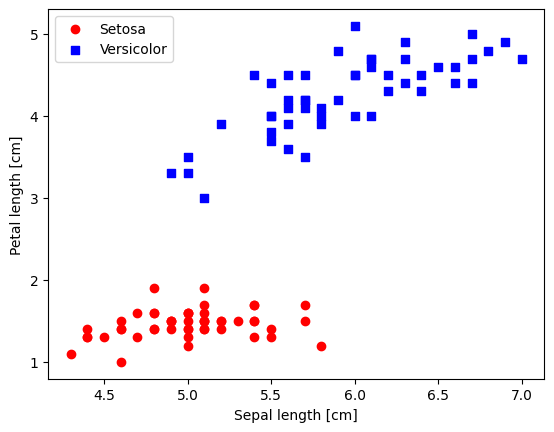

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(s, header=None, encoding='utf-8')

df



setosa = df[df[4] == 'Iris-setosa']
versicolor = df[df[4] == 'Iris-versicolor']
X = np.concatenate((setosa.iloc[:, [0, 2]].values, versicolor.iloc[:, [0, 2]].values))
y = np.where(df[(df[4] == 'Iris-setosa') |  (df[4] == 'Iris-versicolor')].iloc[:, 4].values == 'Iris-setosa', 1, 0)

plt.scatter(setosa[0], setosa[2], color='red', marker='o', label='Setosa')
plt.scatter(versicolor[0], versicolor[2], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

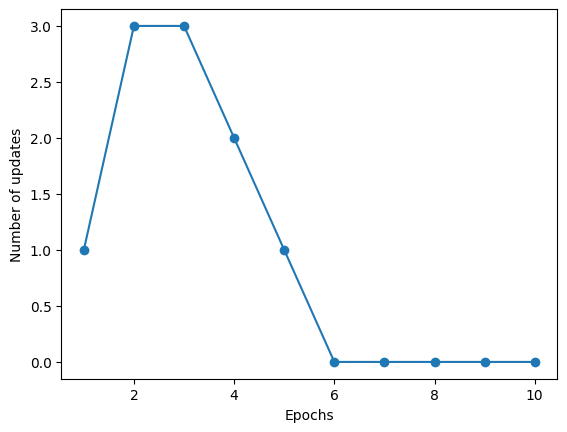

In [3]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=[cmap(idx)],
        marker=markers[idx], label=cl)
        

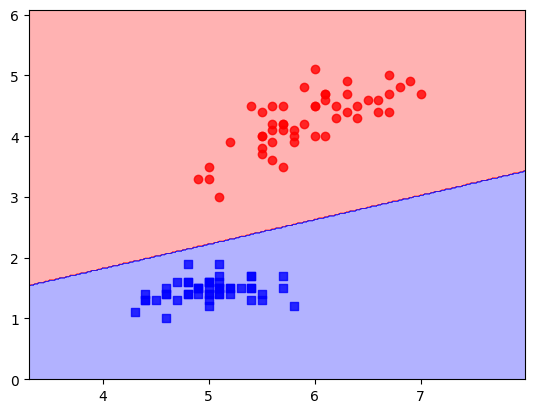

In [5]:
plot_decision_regions(X, y, classifier=ppn)

In [22]:
class AdalineGD:
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    b_ : Scalar
    Bias unit after fitting.
    losses_ : list
    Mean squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples
        is the number of examples and
        n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            '''
            Update the weights and bias:
            
            for w_j in range(self.w_.shape[0]):
                self.w_[w_j] += self.eta * (2.0 * (X[:, w_j]*errors)).mean()
            
            '''
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0] # update weights faster using matrix multiplication
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
            print(f'Loss: {loss}')
            print(f'Weights: {self.w_}')
            print(f'Bias: {self.b_}')
            
        return self

    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    
    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)


![alt text](img/a.png)

Loss: 0.4327702851793115
Weights: [0.43835226 0.09954923]
Bias: 0.08572810674252984
Loss: 5.90491036727035
Weights: [-2.14136211 -1.44585018]
Bias: -0.36804454292933114
Loss: 287.68141803180663
Weights: [16.49953135  8.90659818]
Bias: 2.9762474358215347
Loss: 14495.590426330058
Weights: [-115.59760229  -65.0788507 ]
Bias: -20.670926051762965
Loss: 730716.051189262
Weights: [822.48733454 459.8403263 ]
Bias: 147.301289724231
Loss: 36835268.66168608
Weights: [-5837.75132535 -3267.37305636]
Bias: -1045.2372124468072
Loss: 1856859609.0772614
Weights: [41449.98218228 23195.56845107]
Bias: 7421.822067701425
Loss: 93603976211.92131
Weights: [-294292.26536424 -164691.17665501]
Bias: -52694.15623108447
Loss: 4718560477051.465
Weights: [2089473.73153376 1169302.31817643]
Bias: 374128.60129400913
Loss: 237861828916220.16
Weights: [-14835236.1611909   -8302035.58160688]
Bias: -2656307.822933222
Loss: 1.199057422926665e+16
Weights: [1.05330001e+08 5.89443497e+07]
Bias: 18859754.41614028
Loss: 6.0444

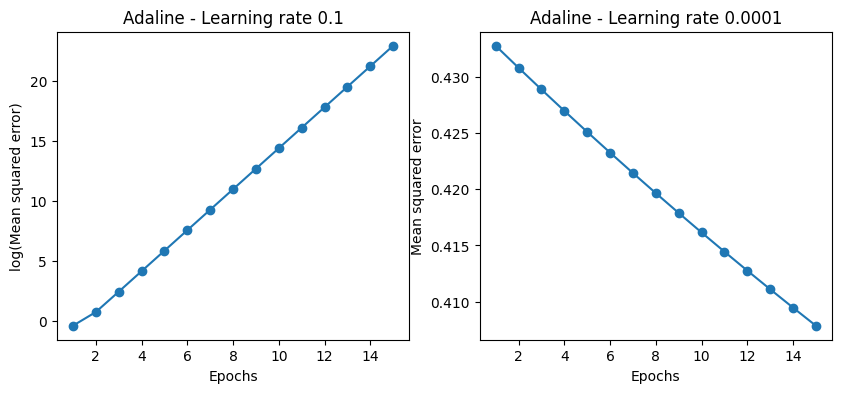

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))


ada1 = AdalineGD(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_) + 1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')


ada2 = AdalineGD(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_) + 1), ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Here, xj is a vector consisting of the jth feature values of all training examples, n, and this standardization technique is applied to each feature, j, in our dataset.  

One of the reasons why standardization helps with gradient descent learning is that it is easier to find a learning rate that works well for all weights (and the bias).  

If the features are on vastly different scales, a learning rate that works well for updating one weight might be too large or too small to update the other weight equally well.

Loss: 0.5060360032348828
Weights: [-0.35917523 -0.49817364]
Bias: 0.5
Loss: 0.17311814978069306
Weights: [ 0.04056582 -0.19318755]
Bias: 0.4999999999999993
Loss: 0.11839433693367951
Weights: [-0.20720159 -0.51793287]
Bias: 0.5
Loss: 0.08227792089344231
Weights: [ 0.056618  -0.3166493]
Bias: 0.4999999999999995
Loss: 0.058441944565585116
Weights: [-0.1069026  -0.53097349]
Bias: 0.49999999999999994
Loss: 0.04271076661954559
Weights: [ 0.06721206 -0.39813112]
Bias: 0.4999999999999996
Loss: 0.032328563005727534
Weights: [-0.04070765 -0.53957999]
Bias: 0.49999999999999994
Loss: 0.02547655533989893
Weights: [ 0.07420389 -0.45190718]
Bias: 0.4999999999999997
Loss: 0.02095439310932136
Weights: [ 0.00297944 -0.54526007]
Bias: 0.49999999999999994
Loss: 0.017969873500324487
Weights: [ 0.07881833 -0.4873981 ]
Bias: 0.4999999999999998
Loss: 0.016000161481534495
Weights: [ 0.03181189 -0.5490088 ]
Bias: 0.49999999999999994
Loss: 0.014700198356725355
Weights: [ 0.08186375 -0.51082127]
Bias: 0.499999999

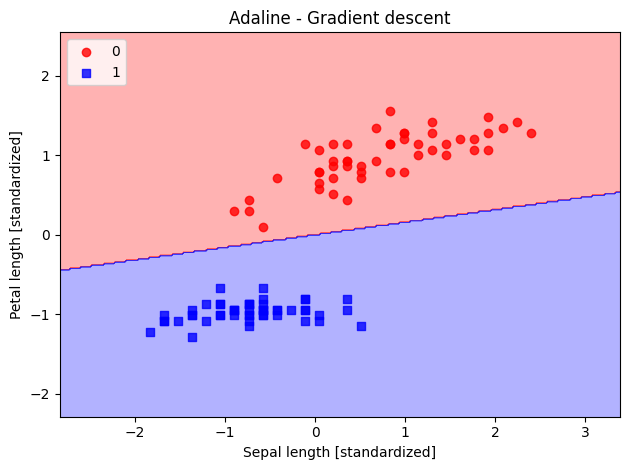

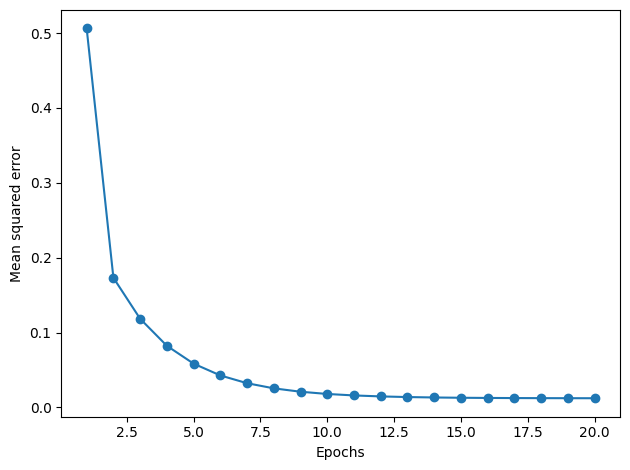

In [24]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada_gd = AdalineGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

# Adaline Stochastic gradient descent

In [25]:
class AdalineSGD:
    """ADAptive LInear NEuron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    shuffle : bool (default: True)
    Shuffles training data every epoch if True to prevent
    cycles.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    b_ : Scalar
    Bias unit after fitting.
    losses_ : list
    Mean squared error loss function value averaged over all
    training examples in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=10,
        shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of
        examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = sum(losses) / len(y)
            self.losses_.append(avg_loss)
            print(f'Loss: {avg_loss}')
            print(f'Weights: {self.w_}')
            print(f'Bias: {self.b_}')
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi.dot(error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after
        unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    

Loss: 0.1317269046274906
Weights: [-0.11136541 -0.34796368]
Bias: 0.43400909094867857
Loss: 0.025148737571036958
Weights: [-0.0505223  -0.41707432]
Bias: 0.49582958222240553
Loss: 0.01790290717433184
Weights: [-0.00243423 -0.45916488]
Bias: 0.4968110965628757
Loss: 0.01497733523988266
Weights: [ 0.02639778 -0.49208486]
Bias: 0.48910504505978725
Loss: 0.013598551534383297
Weights: [ 0.0397297  -0.51761607]
Bias: 0.5075168719745073
Loss: 0.013158984198864245
Weights: [ 0.05215672 -0.53266568]
Bias: 0.500565321157251
Loss: 0.012768770982470817
Weights: [ 0.06513437 -0.54029437]
Bias: 0.48877606534926454
Loss: 0.012857374555811978
Weights: [ 0.07913184 -0.53922152]
Bias: 0.4966944042308031
Loss: 0.012511194401268409
Weights: [ 0.07437887 -0.55454698]
Bias: 0.48662007306195887
Loss: 0.01268685662237344
Weights: [ 0.08759571 -0.54657091]
Bias: 0.5053542109856466
Loss: 0.012671301750763555
Weights: [ 0.0777446  -0.55922841]
Bias: 0.5042107990851574
Loss: 0.012691204804453208
Weights: [ 0.0898

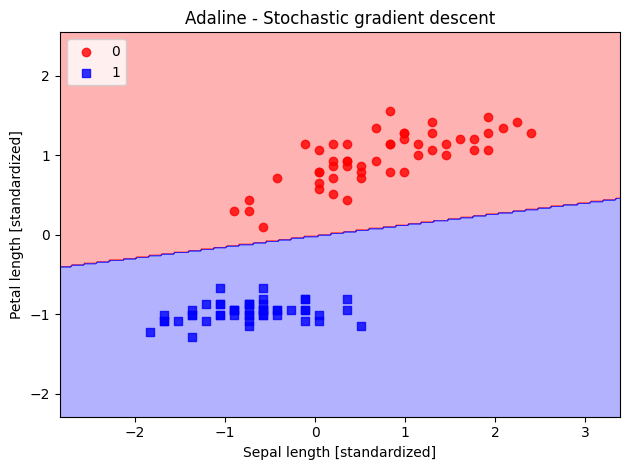

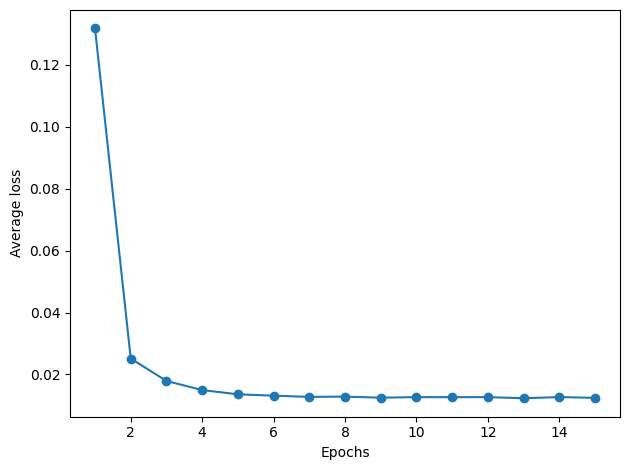

In [26]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()

# Logistic Regression

In [29]:
class LogisticRegressionGD:
    """Gradient descent-based logistic regression classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    random_state : int
    Random number generator seed for random weight
    initialization.
    Attributes
    -----------
    w_ : 1d-array
    Weights after training.
    b_ : Scalar
    Bias unit after fitting.
    losses_ : list
    Mean squared error loss function values in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
        Training vectors, where n_examples is the number of
        examples and n_features is the number of features.
        y : array-like, shape = [n_examples]
        Target values.
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)
        return self
    
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
   
   
    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    